# combine master files

## 필요한 모듈

이 프로젝트를 위해서는 아래의 모듈이 필요하다. 

> numpy, pandas, matplotlib, astropy, version_information

### 모듈 설치

1. 콘솔 창에서 모듈을 설치할 때는 아래와 같은 형식으로 입력하면 된다.

>pip install module_name==version

>conda install module_name==version

2. 주피터 노트북(코랩 포함)에 설치 할 때는 아래의 셀을 실행해서 실행되지 않은 모듈을 설치할 수 있다. (pip 기준) 만약 아나콘다 환경을 사용한다면 7행을 콘다 설치 명령어에 맞게 수정하면 된다.

In [1]:
# Install a pip package in the current Jupyter kernel
import importlib, sys, subprocess
print(f"sys.executable: {sys.executable}")

packages = "numpy, pandas, matplotlib, ysfitsutilpy, astropy, photutils, ccdproc, version_information" # required modules
pkgs = packages.split(", ")
for pkg in pkgs :
    if not importlib.util.find_spec(pkg):
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
        print(f"**** {pkg} module is now installed.")
    else: 
        print(f"******** {pkg} module is already installed.")
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information {packages}
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

sys.executable: /home/guitar79/anaconda3/envs/astro_Python_env/bin/python
******** numpy module is already installed.
******** pandas module is already installed.
******** matplotlib module is already installed.
******** ysfitsutilpy module is already installed.
******** astropy module is already installed.
******** photutils module is already installed.
******** ccdproc module is already installed.
******** version_information module is already installed.
This notebook was generated at 2024-11-28 14:40:29 (KST = GMT+0900) 
0 Python     3.12.3 64bit [GCC 11.2.0]
1 IPython    8.25.0
2 OS         Linux 6.8.0 49 generic x86_64 with glibc2.39
3 numpy      1.26.4
4 pandas     2.2.2
5 matplotlib 3.8.4
6 ysfitsutilpy 0.2
7 astropy    6.1.0
8 photutils  1.12.0
9 ccdproc    2.4.2
10 version_information 1.0.4


### 모듈 버전 확인

아래 셀을 실행하면 이 노트북을 실행한 파이썬 및 관련 모듈의 버전을 확인할 수 있다.

### import modules

In [2]:
from glob import glob
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
#from astropy.stats import sigma_clip
#from ccdproc import combine, ccd_process, CCDData
from astropy.io import fits
import matplotlib.pyplot as plt

import ysfitsutilpy as yfu
#import ysphotutilpy as ypu
#import ysvisutilpy as yvu

import _astro_utilities
import _Python_utilities

# 프로젝트 폴더 

파일명을 통해 프로젝트를 확인하기 위하여 폴더명/파일명은 다음과 같은 규칙으로 저장하고 있다. 
폴더명(파일명) 구조: object name]_[image type]_[filter]_[OBS datetime]_[exptime]_[optic name]_[detector name]_[OBS temperature]_[binning].fit

그리고 프로젝트 마다 폴더를 구분하여 저장하고 있으며, 프로젝트 폴더마다 전처리를 동일한 파일로 수행하는 방법을 택하고 있다. 
전처리 파일은 "CAL-BDF" 폴더에 모두 넣어두고 마스터 파일을 만든다.

폴더명/파일명은 pathlib을 이용하여 처리한다.

In [3]:
#%%
#######################################################
BASEDIR = Path("/mnt/Rdata/OBS_data")  

PROJECDIR = BASEDIR / "C1-Variable"
TODODIR = PROJECDIR / "-_-_-_2016-_-_RiLA600_STX-16803_-_2bin"
TODODIR = PROJECDIR / "-_-_-_2017-01_-_RiLA600_STX-16803_-_2bin"
TODODIR = PROJECDIR / "-_-_-_2017-03_-_RiLA600_STX-16803_-_2bin"
TODODIR = PROJECDIR / "-_-_-_2017-05_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2017-06_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2022-01_-_RiLA600_STX-16803_-_2bin"

# PROJECDIR = BASEDIR / "C2-Asteroid"
# TODODIR = PROJECDIR / "-_-_-_2022-_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2022-_-_RiLA600_STX-16803_-_1bin"
# # TODODIR = PROJECDIR / "-_-_-_2022-_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2023-_-_RiLA600_STX-16803_-_2bin"

# PROJECDIR = BASEDIR / "C3-EXO"
# TODODIR = PROJECDIR / "-_-_-_2024-05_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-05_-_RiLA600_STX-16803_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-06_-_GSON300_STF-8300M_-_1bin"
# TODODIR = PROJECDIR / "-_-_-_2024-06_-_RiLA600_STX-16803_-_2bin"
# TODODIR = PROJECDIR / "-_-_-_2024-09_-_GSON300_STF-8300M_-_1bin"

# PROJECDIR = BASEDIR / "C4-Spectra"
# TODODIR = PROJECDIR / "-_-_-_2024-05_TEC140_ASI183MMPro_-_1bin"

DOINGDIRs = sorted(_Python_utilities.getFullnameListOfsubDirs(TODODIR))
print ("DOINGDIRs: ", format(DOINGDIRs))
print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

try : 
    BDFDIR = [x for x in DOINGDIRs if "CAL-BDF" in str(x)]
    print ("BDFDIR: ", format(BDFDIR))
    BDFDIR = Path(BDFDIR[0])    
except : 
    BDFDIR = TODODIR
    pass

DOINGDIRs = sorted([x for x in DOINGDIRs if "_LIGHT_" in str(x)])
# print ("DOINGDIRs: ", format(DOINGDIRs))
# print ("len(DOINGDIRs): ", format(len(DOINGDIRs)))

# filter_str = 'IW'
# DOINGDIRs = [x for x in DOINGDIRs if filter_str in str(x)]
# remove = 'BIAS'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'DARK'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
# remove = 'FLAT'
# DOINGDIRs = [x for x in DOINGDIRs if remove not in x]
print ("DOINGDIRs: ", DOINGDIRs)
print ("len(DOINGDIRs): ", len(DOINGDIRs))
#######################################################

DOINGDIRs:  ['/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_-_RiLA600_STX-16803_-_2bin/-_CAL-BDF_-_2017-05_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_-_RiLA600_STX-16803_-_2bin/NSV-7244_LIGHT_-_2017-05-19_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_-_RiLA600_STX-16803_-_2bin/NSV-7244_LIGHT_-_2017-05-21_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_-_RiLA600_STX-16803_-_2bin/NSV-7244_LIGHT_-_2017-05-22_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_-_RiLA600_STX-16803_-_2bin/NSV-7244_LIGHT_-_2017-05-24_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_-_RiLA600_STX-16803_-_2bin/NSV-9237_LIGHT_-_2017-05-18_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_-_RiLA600_STX-16803_-_2bin/NSV-9237_LIGHT_-_2017-05-25_-_RiLA600_STX-16803_-_2bin/', '/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_-_RiLA600_STX-16803_-_2b

# summary 만들기

ysfitsutilpy는 fits 파일 다루기 매우 편리한 모듈이며 https://github.com/ysBach/ysfitsutilpy 에서 그 정보를 얻을 수 있다. 
yfu.summary 함수를 이용하여 fits file 의 summary dataframe을 만든다. 모든 bias, dark, flat 파일을 BDFDIR 폴더 안에 미리 복사해 둔다.

In [4]:
tryagain = False

# DOINGDIR = Path(BDFDIR[0])
print(f"Starting: {str(BDFDIR.parts[-1])}")

MASTERDIR = BDFDIR / _astro_utilities.master_dir

summary = yfu.make_summary(BDFDIR/"*.fit*", 
                           verbose = False,
                           )
if summary is not None :
    #print(summary)
    print("len(summary):", len(summary))
    print("summary:", summary)
    #print(summary["file"][0])

Starting: -_CAL-BDF_-_2017-05_-_RiLA600_STX-16803_-_2bin


DELMAG   =   0.0000            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]
FWHMHS   =   0.0000            /Horizontal FWHM std dev, pixels                  [astropy.io.fits.card]
FWHMVS   =   0.0000            /Vertical FWHM std dev, pixels                    [astropy.io.fits.card]
DELMAG   =  -0.3200            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]
DELMAG   =  -0.3582            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]


len(summary): 112
summary:                                                   file  filesize  SIMPLE  \
0    /mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_...   8395200    True   
1    /mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_...   8395200    True   
2    /mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_...   8395200    True   
3    /mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_...   8395200    True   
4    /mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_...   8395200    True   
..                                                 ...       ...     ...   
107  /mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_...   8395200    True   
108  /mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_...   8395200    True   
109  /mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_...   8395200    True   
110  /mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_...   8395200    True   
111  /mnt/Rdata/OBS_data/C1-Variable/-_-_-_2017-05_...   8395200    True   

     BITPIX  NAXIS  NAXIS1  NAXIS2  BSCALE    BZERO OBSERVAT

# 파일 확인

In [5]:
summary.columns

Index(['file', 'filesize', 'SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2',
       'BSCALE', 'BZERO', 'OBSERVAT', 'DETECTOR', 'OBSERVER', 'IMAGETYP',
       'FILTER', 'OBJECT', 'DATE-OBS', 'TIME-OBS', 'SIDEREAL', 'EXPTIME',
       'CCD-TEMP', 'SET-TEMP', 'GAIN', 'RDNOISE', 'RA', 'DEC', 'EPOCH',
       'SUBSET', 'AZIMUTH', 'ALTITUDE', 'AIRMASS', 'FOCUSVAL', 'DELMAG',
       'FWHMH', 'FWHMV', 'FWHMHS', 'FWHMVS', 'NSTAR', 'NOTES', 'OPTIC',
       'CCDNAME', 'EXPOSURE', 'EGAIN', 'FOCALLEN', 'PIXSCALE', 'XBINNING',
       'YBINNING', 'FLIPSTAT', 'FOCRATIO', 'TELESCOP', 'APATURE', 'TELESCOPE'],
      dtype='object')

In [6]:
# check_filters = summary['FILTER'].drop_duplicates()
# check_filters = check_filters.reset_index(drop=True)
# print("check_filters", check_filters)

# EXPkeys = ['EXPSORE', 'EXPTIME']
# for EXPkey in EXPkeys :
#     if EXPkey in summary :
#         check_exptimes = summary[EXPkey].drop_duplicates()
#         check_exptimes = check_exptimes.reset_index(drop=True)
# print("check_exptimes", check_exptimes)


### BIAS

master bias 만들기

In [7]:
if ( MASTERDIR / "master_bias.fits").exists() and not tryagain :
    print("bias file is already exist....")
else :
    #dark_fits = summary[summary["IMAGETYP"] == "DARK"]["file"]
    summary_bias = summary.loc[summary["IMAGETYP"] == "BIAS"].copy()
    summary_bias.reset_index(inplace=True)
    # print("summary_bias", summary_bias)

    bias_fits = summary_bias["file"]
    # print("type(bias_fits)", type(bias_fits))
    print("len(bias_fits)", len(bias_fits))
    # print("bias_fits", bias_fits)

    bias_comb = yfu.group_combine(
                    bias_fits.tolist(),
                    type_key = ["IMAGETYP"],
                    type_val = ["BIAS"],
                    group_key = ["EXPTIME"],
                    fmt = "master_bias.fits",  # output file name format
                    outdir = MASTERDIR,  # output directory (will automatically be made if not exist)
                    combine = "med",
                    memlimit = 2.e+10,
                    verbose = True,
                )

bias file is already exist....


화면에 디스플레이 해보기

DELMAG   =   0.0000            /Veriable - Comparison,   Delmag                  [astropy.io.fits.card]
FWHMHS   =   0.0000            /Horizontal FWHM std dev, pixels                  [astropy.io.fits.card]
FWHMVS   =   0.0000            /Vertical FWHM std dev, pixels                    [astropy.io.fits.card]


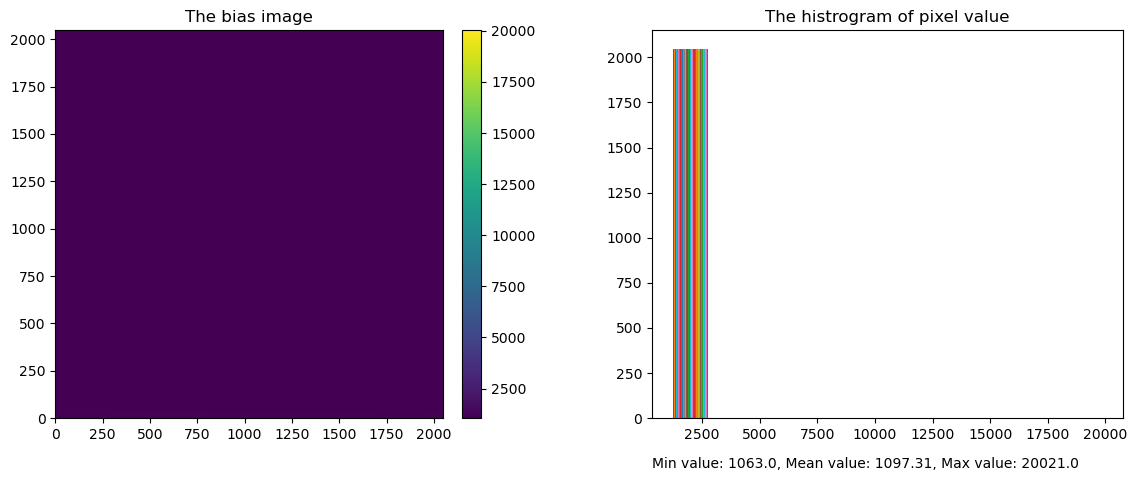

In [8]:
hdul = fits.open(MASTERDIR / "master_bias.fits")

fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = axs[0].imshow(hdul[0].data,
                origin='lower',
                )
im2 = axs[1].hist(hdul[0].data,
                )

axs[0].set_title('The bias image')
axs[1].set_title('The histrogram of pixel value')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Max value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)

zimshow를 이용해 보자.

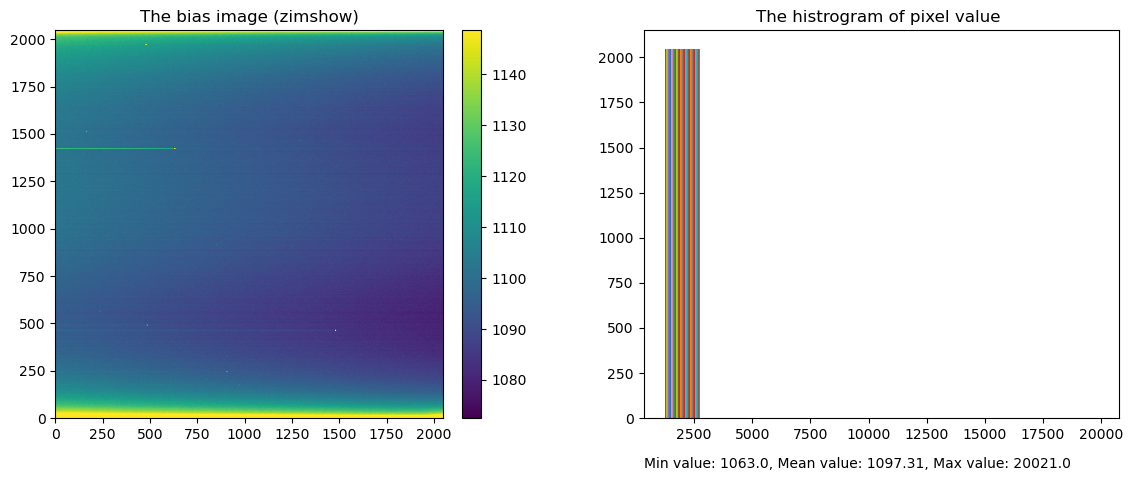

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs[0], 
                            hdul[0].data,
                            )
im2 = axs[1].hist(hdul[0].data,
                )

axs[0].set_title('The bias image (zimshow)')
axs[1].set_title('The histrogram of pixel value ')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Max value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)

히스토그램 범위 변경

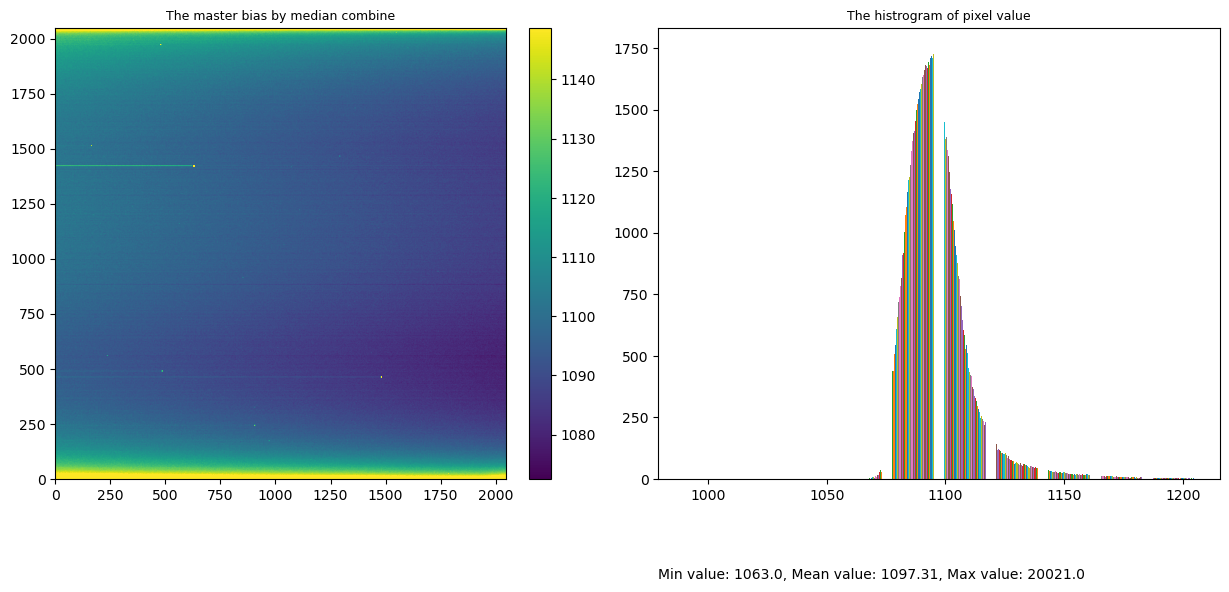

In [10]:
hdul = fits.open(MASTERDIR / "master_bias.fits")

fig, axs = plt.subplots(1, 2, figsize=(13, 6),
                        sharex=False, sharey=False, gridspec_kw=None)

im1 = _astro_utilities.zimshow(axs[0],
            hdul[0].data,
            cmap='viridis',
            origin='lower',)

im2 = axs[1].hist(hdul[0].data,
                  range=(hdul[0].data.mean()*.9, hdul[0].data.mean()*1.1),
                  )

axs[0].set_title(f'The master bias by median combine', fontsize=9)
axs[1].set_title('The histrogram of pixel value', fontsize=9)

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Max value: {hdul[0].data.max()}",
             xy=(0, -100), xycoords='axes pixels')
plt.tight_layout(pad=1.0)
plt.show()

### DARK

master dark 합성시에 group_key 값을 ["EXPTIME"] 으로 해주면 같은 노출 시간 끼리 합성해 준다.

In [11]:
help(yfu.group_combine)

Help on function group_combine in module ysfitsutilpy.imutil.imcombine:

group_combine(inputs, type_key=None, type_val=None, group_key=None, fmt=None, outdir=None, verbose=1, **kwargs)
    Combine sub-groups of FITS files from the given input.
    Parameters
    ----------
    inputs : DataFrame, glob pattern, list-like of path-like
        If `DataFrame`, it must be the summary table made by `make_summary`.
        The `~glob` pattern for files (e.g., ``"2020*[012].fits"``) or list of
        files (each element must be path-like or CCDData). Although it is not a
        good idea, a mixed list of CCDData and paths to the files is also
        acceptable. For the purpose of imcombine function, the best use is to
        use the `~glob` pattern or list of paths.

    type_key, type_val : str, list of str
        The header keyword for the ccd type, and the value you want to match.

    group_key : None, str, list of str, optional
        The header keyword which will be used to make gr

In [12]:
check_exptimes

NameError: name 'check_exptimes' is not defined

In [ ]:
#dark_fits = summary[summary["IMAGETYP"] == "DARK"]["file"]
summary_dark = summary.loc[summary["IMAGETYP"] == "DARK"].copy()
summary_dark.reset_index(inplace=True)
# print("summary_dark", summary_dark)

# EXPkeys = ['EXPSORE', 'EXPTIME']
# for EXPkey in EXPkeys :
#     if EXPkey in summary_dark :
#         check_exptimes = summary_dark[EXPkey].drop_duplicates()
#         check_exptimes = check_exptimes.reset_index(drop=True)

if 'EXPTIME' in summary_dark :
    check_exptimes = summary_dark['EXPTIME'].drop_duplicates()
    check_exptimes = check_exptimes.reset_index(drop=True)
    print("check_exptimes", check_exptimes)

    for exptime in check_exptimes :
        if (MASTERDIR / f"master_dark_{exptime:.0f}sec.fits" ).exists() and not tryagain :
            print(f"master_dark_{exptime:.0f}sec.fits already exist....")
        else :
            summary_dark_each = summary_dark.loc[summary_dark['EXPTIME'] == exptime]
            dark_fits = summary_dark_each['file']
            # print("type(dark_fits)", type(dark_fits))
            print("len(dark_fits)", len(dark_fits))
            # print("dark_fits", dark_fits)

            # Say dark frames have header OBJECT = "calib" && "IMAGE-TYP" = "DARK"
            dark_comb = yfu.group_combine(
                        dark_fits.tolist(),
                        type_key = ["IMAGETYP"],
                        type_val = ["DARK"],
                        group_key = ["EXPTIME"],
                        fmt = "master_dark_{:.0f}sec.fits",  # output file name format
                        outdir = MASTERDIR,  # output directory (will automatically be made if not exist)
                        combine = "med",
                        memlimit = 2.e+10,
                        verbose = True,
                    )

check_exptimes 0     30.0
1    120.0
2    300.0
3    100.0
Name: EXPTIME, dtype: float64
bias file is already exist....
bias file is already exist....
bias file is already exist....
bias file is already exist....


In [ ]:
# #dark_fits = summary[summary["IMAGETYP"] == "DARK"]["file"]
# dark_fits = summary.loc[summary["IMAGETYP"] == "DARK"].copy()
# dark_fits.reset_index(inplace=True)
# dark_fits = dark_fits["file"]
# print(type(dark_fits))
# print(len(dark_fits))
# print(dark_fits)

# # Say dark frames have header OBJECT = "calib" && "IMAGE-TYP" = "DARK"
# dark_comb = yfu.group_combine(
#                 dark_fits.tolist(),
#                 type_key = ["IMAGETYP"],
#                 type_val = ["DARK"],
#                 group_key = ["EXPTIME"],
#                 fmt = "master_dark_{:.0f}sec.fits",  # output file name format
#                 outdir = MASTERDIR,  # output directory (will automatically be made if not exist)
#                 combine = "med",
#                 memlimit = 2.e+10,
#                 verbose = True,
#             )

In [ ]:
dark_fpaths = sorted(list((MASTERDIR).glob('*dark*.fit*')))
print(f"dark_fpaths: {dark_fpaths}")
print(f"len(dark_fpaths): {len(dark_fpaths)}")

dark_fpaths: [PosixPath('/mnt/Rdata/OBS_data/C1-Variable/-_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/CAL-BDF_-_-_2021-10_-_RiLA600_STX-16803_-_2bin/master_files_ys/master_dark_100sec.fits')]
len(dark_fpaths): 1


In [ ]:
# hdul = fits.open(MASTERDIR / "master_bias.fits")

# fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

# im1 = axs[0].imshow(hdul[0].data)
# im2 = axs[1].hist(hdul[0].data 
#                     #histtype='step',
#                     #50 
#                     )

# axs[0].set_title('The dark image')
# axs[1].set_title('The histrogram of pixel value')

# plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Meax value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

# plt.colorbar(im1, fraction=0.035, pad=0.04)
# plt.tight_layout(pad=5.0)

## Flat

Master flat 합성시에 group_key 값을 ["FILTER"] 로 해주면 같은 필터 끼리 합성해 준다.

In [ ]:
summary_flat = summary.loc[summary["IMAGETYP"] == "FLAT"].copy()
summary_flat.reset_index(inplace=True)

if 'FILTER' in summary_flat :
    check_filters = summary_flat['FILTER'].drop_duplicates()
    check_filters = check_filters.reset_index(drop=True)
    print("check_filters", check_filters)

    for filter in check_filters :
        if (MASTERDIR / f"master_flat_{filter:s}_norm.fits" ).exists() and not tryagain :
            print(f"master_flat_{filter:s}_norm.fits already exist....")
        else : 
            summary_flat_each = summary_flat.loc[summary_flat['FILTER'] == filter]
            flat_fits = summary_flat_each['file']
            # print("type(flat_fits)", type(flat_fits))
            print("len(flat_fits)", len(flat_fits))
            # print("flat_fits", flat_fits)

            # Say dark frames have header OBJECT = "calib" && "IMAGE-TYP" = "DARK"
            flat_comb_norm = yfu.group_combine(
                            flat_fits.tolist(),
                            type_key = ["IMAGETYP"],
                            type_val = ["FLAT"],
                            group_key = ["FILTER"],
                            fmt = "master_flat_{:s}_norm.fits",  # output file name format
                            scale="med_sc", #norm
                            scale_to_0th=False, #norm
                            outdir = MASTERDIR,  # output directory (will automatically be made if not exist)
                            combine = "med",
                            memlimit = 2.e+10,
                            verbose=True,
                        )

            # Say dark frames have header OBJECT = "calib" && "IMAGE-TYP" = "DARK"
            flat_comb = yfu.group_combine(
                            flat_fits.tolist(),
                            type_key = ["IMAGETYP"],
                            type_val = ["FLAT"],
                            group_key = ["FILTER"],
                            fmt = "master_flat_{:s}.fits",  # output file name format
                            #scale="med_sc", #norm
                            #scale_to_0th=False, #norm
                            outdir = MASTERDIR,  # output directory (will automatically be made if not exist)
                            combine = "med",
                            memlimit = 2.e+10,
                            verbose=True,
                        )

check_filters 0    B
1    R
2    V
Name: FILTER, dtype: object


In [ ]:
# flat_fits = summary[summary["IMAGETYP"] == "FLAT"]["file"] 
# # Say dark frames have header OBJECT = "calib" && "IMAGE-TYP" = "DARK"
# flat_comb_norm = yfu.group_combine(
#                 flat_fits.tolist(),
#                 type_key = ["IMAGETYP"],
#                 type_val = ["FLAT"],
#                 group_key = ["FILTER"],
#                 fmt = "master_flat_{:s}_norm.fits",  # output file name format
#                 scale="med_sc", #norm
#                 scale_to_0th=False, #norm
#                 outdir = MASTERDIR,  # output directory (will automatically be made if not exist)
#                 combine = "med",
#                 memlimit = 2.e+10,
#                 verbose=True,
#             )

# # Say dark frames have header OBJECT = "calib" && "IMAGE-TYP" = "DARK"
# flat_comb = yfu.group_combine(
#                 flat_fits.tolist(),
#                 type_key = ["IMAGETYP"],
#                 type_val = ["FLAT"],
#                 group_key = ["FILTER"],
#                 fmt = "master_flat_{:s}.fits",  # output file name format
#                 #scale="med_sc", #norm
#                 #scale_to_0th=False, #norm
#                 outdir = MASTERDIR,  # output directory (will automatically be made if not exist)
#                 combine = "med",
#                 memlimit = 2.e+10,
#                 verbose=True,
#             )

In [ ]:
# hdul = fits.open(flat_fits[3])

# fig, axs = plt.subplots(1, 1, figsize=(8, 8), sharex=False, sharey=False, gridspec_kw=None)
# im = yvu.zimshow(axs, hdul[0].data)
# axs.set_title('The flat image')
# plt.colorbar(im, fraction=0.035, pad=0.04)
# plt.tight_layout()

In [ ]:
# fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

# im1 = yvu.zimshow(axs[0], hdul[0].data)
# im2 = axs[1].hist(hdul[0].data 
#                     #histtype='step',
#                     #50 
#                     )

# axs[0].set_title('The flat image')
# axs[1].set_title('The histrogram of pixel value')

# plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Mean value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

# plt.colorbar(im1, fraction=0.035, pad=0.04)
# plt.tight_layout(pad=5.0)

## Flat image

skyflat image

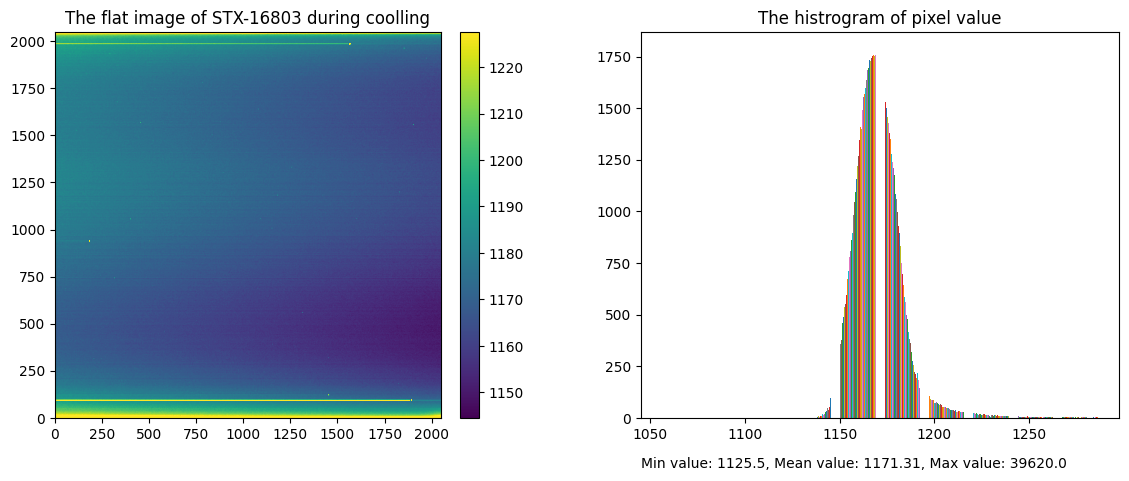

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False, gridspec_kw=None)

#im1 = yvu.zimshow(axs[0], hdul[0].data)
im1 = _astro_utilities.zimshow(axs[0], 
                               hdul[0].data)
im2 = axs[1].hist(hdul[0].data ,
                  range=(hdul[0].data.mean()*.9, hdul[0].data.mean()*1.1),
                    )

axs[0].set_title('The flat image of STX-16803 during coolling')
axs[1].set_title('The histrogram of pixel value')

plt.annotate(f"Min value: {hdul[0].data.min()}, Mean value: {hdul[0].data.mean():.02f}, Max value: {hdul[0].data.max()}", xy=(0, -50), xycoords='axes pixels')

plt.colorbar(im1, fraction=0.0455, pad=0.04)
plt.tight_layout(pad=5.0)